# Relationship between Neighborhoods and Covid-19 cases


### Applied Data Science Capstone Week 5

### Introduction


Santa Clara County has been one of the first counties hit by Covid-19. While government officials have been vigilant on minimizing the spread of the virus, Covid-19 still spreads at an alarming rate.

This project will try get the ralationship of neighborhoods and Covid-19 cases. The stakeholders of this project are the general public & health workers in Santa Clara County California that needs to understand why certain neighborhoods have more Covid-19 cases than others. 

We will Study neighborhoods in Santa Clara county using zipcodes to represent neighborhoods. After this study we will atleast learn a little bit why some neighborhhod have more Covid-19 cases than others.


### Data

Based on our problem, we need to gather data on :

The neighborhoods in Santa Clara County and its coordinates using zipcodes
- The number of Covid-19 cases per neighborhood(using zipcode)
- The population of each Santa Clara County neighborhood
- The venues near each Santa Clara neighborhood

We will be using :
- Santa Clara County Open Data COVID-19 cases by zip code of residence: <br>
https://data.sccgov.org/COVID-19/COVID-19cases-by-zip-code-of-residence/j2gj-bg6c/data 
- Opendatasoft US Zip Code Latitude and Longitude:<br>
https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/
- Foursquare venues data:<br>
https://foursquare.com/

Using this data will let us explore, analyze and answer our questions. The Covid-19 cases data will show us the number of infections by zip code, and the Us zipcodes will give us the coordinates in longitude and latitude of the neighborhoods. The Foursquare api will be used to explore and get the venues in a given neighborhood and cluster it to determine if a certain kind of neighborhood affects Covid-19 spread.



In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import requests
!pip install folium
import folium 
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


print('imported')

imported


### Download the data that we will use

In [2]:
#Download Covid-19 cases data
url='https://github.com/jamescuevo/Coursera_Capstone/blob/main/COVID-19_cases_by_zip_code_of_residence.csv'
df_cases=pd.read_html(url, header=0)[0]
df_cases.head(15)

,Unnamed: 0,zipcode,Cases,Population,Rate
0,NaN,94022,322,19378,1662
1,NaN,94024,347,23961,1448
2,NaN,94040,1052,35845,2935
3,NaN,94041,433,14394,3008
4,NaN,94043,739,31488,2347
5,NaN,94085,876,23612,3710
6,NaN,94086,1381,49630,2783
7,NaN,94087,966,57219,1688
8,NaN,94089,786,22313,3523
9,NaN,94301,345,17191,2007


In [3]:
df_cases.shape

(57, 5)

In [4]:
#Latitude and longitude for each zipcode
url2='https://raw.githubusercontent.com/jamescuevo/Coursera_Capstone/main/us-zip-code-latitude-and-longitude%20(3).csv'
df_latlong = pd.read_csv(url2, sep=';') 
df_latlong=df_latlong.rename(columns={'Zip':'zipcode'}, errors="raise")
df_latlong

,zipcode,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,90056,Los Angeles,CA,33.986212,-118.370990,-8,1,"33.986212,-118.37099"
1,91356,Tarzana,CA,34.164255,-118.544720,-8,1,"34.164255,-118.54472"
2,92513,Riverside,CA,33.752886,-116.055617,-8,1,"33.752886,-116.055617"
3,92663,Newport Beach,CA,33.619221,-117.930870,-8,1,"33.619221,-117.93087"
4,92832,Fullerton,CA,33.869114,-117.929850,-8,1,"33.869114,-117.92985"
...,...,...,...,...,...,...,...,...
2711,92079,San Marcos,CA,33.016928,-116.846046,-8,1,"33.016928,-116.846046"
2712,92316,Bloomington,CA,34.064062,-117.394320,-8,1,"34.064062,-117.39432"
2713,93034,Oxnard,CA,34.032383,-119.134300,-8,1,"34.032383,-119.1343"
2714,95127,San Jose,CA,37.369473,-121.820770,-8,1,"37.369473,-121.82077"


### Merge the 2 dataframes into 1

In [5]:
df1=df_cases.merge(df_latlong,on='zipcode',how ='left')
df1.head(15)

,Unnamed: 0,zipcode,Cases,Population,Rate,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,NaN,94022,322,19378,1662,Los Altos,CA,37.377140,-122.124120,-8,1,"37.37714,-122.12412"
1,NaN,94024,347,23961,1448,Los Altos,CA,37.353741,-122.087170,-8,1,"37.353741,-122.08717"
2,NaN,94040,1052,35845,2935,Mountain View,CA,37.380207,-122.087870,-8,1,"37.380207,-122.08787"
3,NaN,94041,433,14394,3008,Mountain View,CA,37.389490,-122.078460,-8,1,"37.38949,-122.07846"
4,NaN,94043,739,31488,2347,Mountain View,CA,37.406790,-122.074610,-8,1,"37.40679,-122.07461"
5,NaN,94085,876,23612,3710,Sunnyvale,CA,37.388940,-122.017956,-8,1,"37.38894,-122.017956"
6,NaN,94086,1381,49630,2783,Sunnyvale,CA,37.378341,-122.023980,-8,1,"37.378341,-122.02398"
7,NaN,94087,966,57219,1688,Sunnyvale,CA,37.350091,-122.036020,-8,1,"37.350091,-122.03602"
8,NaN,94089,786,22313,3523,Sunnyvale,CA,37.406289,-122.008380,-8,1,"37.406289,-122.00838"
9,NaN,94301,345,17191,2007,Palo Alto,CA,37.443688,-122.150710,-8,1,"37.443688,-122.15071"


In [6]:

df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df1=df1.drop(columns=['Timezone','Daylight savings time flag','geopoint','State'])
df1.head(15)

,zipcode,Cases,Population,Rate,City,Latitude,Longitude
0,94022,322,19378,1662,Los Altos,37.377140,-122.124120
1,94024,347,23961,1448,Los Altos,37.353741,-122.087170
2,94040,1052,35845,2935,Mountain View,37.380207,-122.087870
3,94041,433,14394,3008,Mountain View,37.389490,-122.078460
4,94043,739,31488,2347,Mountain View,37.406790,-122.074610
5,94085,876,23612,3710,Sunnyvale,37.388940,-122.017956
6,94086,1381,49630,2783,Sunnyvale,37.378341,-122.023980
7,94087,966,57219,1688,Sunnyvale,37.350091,-122.036020
8,94089,786,22313,3523,Sunnyvale,37.406289,-122.008380
9,94301,345,17191,2007,Palo Alto,37.443688,-122.150710


In [7]:
df1.shape

(57, 7)

### Map of Santa Clara County Neighborhhods

In [66]:
# create map of Santa Clara County using latitude and longitude values
latitude = 37.3541079
longitude =-121.9552356
map_santa_clara = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode, city, pop, cases in zip(df1['Latitude'], df1['Longitude'], df1['zipcode'], df1['City'], df1['Population'],df1['Cases']):
    label = '{}, {}, {}'.format(zipcode, city, cases)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=5 + ((pop / 50)),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santa_clara)  
    
map_santa_clara

### Methodology

In this project we will findout what kind of neighborhoods produce more cases of Covid-19 limited to Santa Clara County, California.

1. First we gather all zipcodes in Santa Clara County
2. Get the number of Covid-19 cases per zipcode
3. Get the longitude and latitude of each zipcode
4. Use Foursquare to get venues near each zipcode
5. Get the total number of venues based on venue category for each zipcode
6. Group the zipcodes by clusters using K-means clustering

### Credentials for Foursquare api

In [9]:
CLIENT_ID = 'TV4P2FO3SOERBOSOOUSX20MIQXZQMA2IN00DJ2PDNSTFNRSH' # your Foursquare ID
CLIENT_SECRET = 'RTIGUIDAVNDJNPS2IR0TXQYQWJVUBU1SJU4LATKQ0UTGPJ0U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
ACCESS_TOKEN = 'AO5J3VJMKEWE30JYBHZLWM3KH0OR1TFVEINNPMY1AOM3OB3L' # your FourSquare Access Token
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TV4P2FO3SOERBOSOOUSX20MIQXZQMA2IN00DJ2PDNSTFNRSH
CLIENT_SECRET:RTIGUIDAVNDJNPS2IR0TXQYQWJVUBU1SJU4LATKQ0UTGPJ0U


In [10]:
#get dataframe for categories
url='https://gist.githubusercontent.com/Zoltrix/d69a52e9f91f4211be93eea1f1398424/raw/6aafac02af1696b0fa701fc733f262cb44aa73ec/venue_subcategories.csv'
cats_df=pd.read_csv(url)
cats_df.head(10)

,venue,venue_category,level
0,Amphitheater,Arts & Entertainment,0
1,Aquarium,Arts & Entertainment,0
2,Arcade,Arts & Entertainment,0
3,Art Gallery,Arts & Entertainment,0
4,Bowling Alley,Arts & Entertainment,0
5,Casino,Arts & Entertainment,0
6,Circus,Arts & Entertainment,0
7,Comedy Club,Arts & Entertainment,0
8,Concert Hall,Arts & Entertainment,0
9,Country Dance Club,Arts & Entertainment,0


In [11]:
#Just a test if it works
category ='Casino'
general_category = cats_df.loc[cats_df['venue'] == category]
general_category = general_category.iloc[0,1]
general_category

'Arts & Entertainment'

In [71]:
#function to get all venues near a location
def getNearbyVenues(cities, zipcodes, populations, lats, lngs, radius=1000):
    LIMIT = 100
    venues_list=[]
    for city, zipc, pop, lat, lng in zip(cities,zipcodes,populations, lats, lngs):
        #print(zipc)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for i in results:
            category = i['venue']['categories'][0]['name']
           # print(category)
            try:
                general_category = cats_df.loc[cats_df['venue'] == category]
                general_category = general_category.iloc[0,1]
            except Exception:
                general_category = category
            #print(general_category)
            venues_list.append([(zipc, city, lat, lng, general_category)])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode', 
                  'City',
                  'Latitude',
                  'Longitude',
                  'Venue Category']
    
    return(nearby_venues)

### Get all venues near zipcodes from Foursquare

In [72]:
venues_df = getNearbyVenues(df1['City'],df1['zipcode'],df1['Population'],df1['Latitude'],df1['Longitude'],5000)
print(venues_df.shape)
venues_df.head(10)

(5286, 5)


,zipcode,City,Latitude,Longitude,Venue Category
0,94022,Los Altos,37.37714,-122.12412,Shop & Service
1,94022,Los Altos,37.37714,-122.12412,Food
2,94022,Los Altos,37.37714,-122.12412,Food
3,94022,Los Altos,37.37714,-122.12412,Outdoors & Recreation
4,94022,Los Altos,37.37714,-122.12412,Food
5,94022,Los Altos,37.37714,-122.12412,Food
6,94022,Los Altos,37.37714,-122.12412,Food
7,94022,Los Altos,37.37714,-122.12412,Food
8,94022,Los Altos,37.37714,-122.12412,Food
9,94022,Los Altos,37.37714,-122.12412,Shop & Service


### Onehot encoding

In [14]:
# one hot encoding
santaclara_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add zipcode column back to dataframe
santaclara_onehot['zipcode'] = venues_df['zipcode'] 

#add zipcode column and move to to first
cols = santaclara_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('zipcode')))

#fixed_columns.insert(0, cols.pop(cols.index('zipcode')))
santaclara_onehot = santaclara_onehot[cols]
santaclara_onehot.head()

,zipcode,Arts & Entertainment,College & University,Escape Room,Food,Martial Arts School,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,94022,0,0,0,0,0,0,0,0,0,1,0
1,94022,0,0,0,1,0,0,0,0,0,0,0
2,94022,0,0,0,1,0,0,0,0,0,0,0
3,94022,0,0,0,0,0,0,1,0,0,0,0
4,94022,0,0,0,1,0,0,0,0,0,0,0


In [15]:
#Group entries by zipcode and compute mean
santaclara_grouped = santaclara_onehot.groupby('zipcode').mean().reset_index()
santaclara_grouped.head(10)

,zipcode,Arts & Entertainment,College & University,Escape Room,Food,Martial Arts School,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,94022,0.03,0.00,0.0,0.45,0.0,0.00,0.24,0.00,0.00,0.25,0.03
1,94024,0.03,0.00,0.0,0.46,0.0,0.00,0.25,0.01,0.00,0.24,0.01
2,94040,0.02,0.00,0.0,0.50,0.0,0.00,0.18,0.00,0.01,0.28,0.01
3,94041,0.03,0.00,0.0,0.51,0.0,0.00,0.20,0.00,0.01,0.25,0.00
4,94043,0.05,0.00,0.0,0.42,0.0,0.00,0.28,0.00,0.01,0.24,0.00
5,94085,0.03,0.00,0.0,0.56,0.0,0.02,0.22,0.00,0.01,0.15,0.01
6,94086,0.02,0.00,0.0,0.57,0.0,0.02,0.23,0.00,0.01,0.15,0.00
7,94087,0.02,0.00,0.0,0.62,0.0,0.01,0.18,0.00,0.00,0.16,0.01
8,94089,0.07,0.00,0.0,0.50,0.0,0.03,0.23,0.01,0.00,0.14,0.02
9,94301,0.06,0.02,0.0,0.53,0.0,0.00,0.17,0.01,0.00,0.20,0.01


In [16]:
#Group entries by zipcode and get the total of venues per zipcode
santaclara_grouped_sum = santaclara_onehot.groupby('zipcode').sum().reset_index()
santaclara_grouped_sum.head(10)

,zipcode,Arts & Entertainment,College & University,Escape Room,Food,Martial Arts School,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,94022,3,0,0,45,0,0,24,0,0,25,3
1,94024,3,0,0,46,0,0,25,1,0,24,1
2,94040,2,0,0,50,0,0,18,0,1,28,1
3,94041,3,0,0,51,0,0,20,0,1,25,0
4,94043,5,0,0,42,0,0,28,0,1,24,0
5,94085,3,0,0,56,0,2,22,0,1,15,1
6,94086,2,0,0,57,0,2,23,0,1,15,0
7,94087,2,0,0,62,0,1,18,0,0,16,1
8,94089,7,0,0,50,0,3,23,1,0,14,2
9,94301,6,2,0,53,0,0,17,1,0,20,1


### Show  most common venues from each zipcode

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
santaclara_venues_sorted = pd.DataFrame(columns=columns)
santaclara_venues_sorted['zipcode'] = santaclara_grouped['zipcode']

for ind in np.arange(santaclara_grouped.shape[0]):
    santaclara_venues_sorted.iloc[ind, 1:] = return_most_common_venues(santaclara_grouped.iloc[ind, :], num_top_venues)

santaclara_venues_sorted.head()

,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,94022,Food,Shop & Service,Outdoors & Recreation,Travel & Transport,Arts & Entertainment,Residence,Professional & Other Places,Nightlife Spot
1,94024,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Travel & Transport,Professional & Other Places,Residence,Nightlife Spot
2,94040,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places,Nightlife Spot
3,94041,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot
4,94043,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot


### Compute Optimum number of clusters (K)

In [19]:
Sum_of_squared_distances = []
temp_santaclara_grouped =santaclara_grouped.drop(columns=['zipcode'])
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(temp_santaclara_grouped)
    Sum_of_squared_distances.append(km.inertia_)
temp_santaclara_grouped.head(5)

,Arts & Entertainment,College & University,Escape Room,Food,Martial Arts School,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.03,0.0,0.0,0.45,0.0,0.0,0.24,0.00,0.00,0.25,0.03
1,0.03,0.0,0.0,0.46,0.0,0.0,0.25,0.01,0.00,0.24,0.01
2,0.02,0.0,0.0,0.50,0.0,0.0,0.18,0.00,0.01,0.28,0.01
3,0.03,0.0,0.0,0.51,0.0,0.0,0.20,0.00,0.01,0.25,0.00
4,0.05,0.0,0.0,0.42,0.0,0.0,0.28,0.00,0.01,0.24,0.00


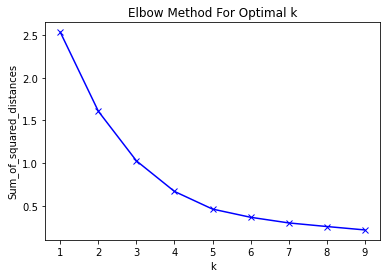

In [20]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimum K = 4

In [21]:
# set number of clusters the elbow is k=4
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(santaclara_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

### Add Cluster Labels to DataFrame

In [22]:
# add clustering labels
if 'Cluster Labels' not in santaclara_venues_sorted:
    santaclara_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

santaclara_merged = df1

# merge santaclara_merged with santaclara_venues_sorted 
santaclara_merged = santaclara_merged.join(santaclara_venues_sorted.set_index('zipcode'), on='zipcode')
santaclara_merged = santaclara_merged.dropna(subset=['Cluster Labels'])
santaclara_merged.head() 

,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,94022,322,19378,1662,Los Altos,37.377140,-122.12412,1,Food,Shop & Service,Outdoors & Recreation,Travel & Transport,Arts & Entertainment,Residence,Professional & Other Places,Nightlife Spot
1,94024,347,23961,1448,Los Altos,37.353741,-122.08717,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Travel & Transport,Professional & Other Places,Residence,Nightlife Spot
2,94040,1052,35845,2935,Mountain View,37.380207,-122.08787,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places,Nightlife Spot
3,94041,433,14394,3008,Mountain View,37.389490,-122.07846,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot
4,94043,739,31488,2347,Mountain View,37.406790,-122.07461,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot


In [23]:

# add clustering labels
if 'Cluster Labels' not in santaclara_grouped_sum:
    santaclara_grouped_sum.insert(0, 'Cluster Labels', kmeans.labels_)

santaclara_merged = df1

santaclara_sum_merged = santaclara_merged.join(santaclara_grouped_sum.set_index('zipcode'), on='zipcode')
santaclara_sum_merged.head() 

,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,Arts & Entertainment,College & University,Escape Room,Food,Martial Arts School,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,94022,322,19378,1662,Los Altos,37.377140,-122.12412,1,3,0,0,45,0,0,24,0,0,25,3
1,94024,347,23961,1448,Los Altos,37.353741,-122.08717,1,3,0,0,46,0,0,25,1,0,24,1
2,94040,1052,35845,2935,Mountain View,37.380207,-122.08787,1,2,0,0,50,0,0,18,0,1,28,1
3,94041,433,14394,3008,Mountain View,37.389490,-122.07846,1,3,0,0,51,0,0,20,0,1,25,0
4,94043,739,31488,2347,Mountain View,37.406790,-122.07461,1,5,0,0,42,0,0,28,0,1,24,0


### Show the most Common venues for each zipcode

In [42]:
# add clustering labels
if 'Cluster Labels' not in santaclara_venues_sorted:
    santaclara_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

santaclara_merged = df1

# merge santaclara_merged with santaclara_venues_sorted 
santaclara_merged = santaclara_merged.join(santaclara_venues_sorted.set_index('zipcode'), on='zipcode')
santaclara_merged = santaclara_merged.dropna(subset=['Cluster Labels'])
santaclara_merged.head() 

,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,94022,322,19378,1662,Los Altos,37.377140,-122.12412,1,Food,Shop & Service,Outdoors & Recreation,Travel & Transport,Arts & Entertainment,Residence,Professional & Other Places,Nightlife Spot
1,94024,347,23961,1448,Los Altos,37.353741,-122.08717,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Travel & Transport,Professional & Other Places,Residence,Nightlife Spot
2,94040,1052,35845,2935,Mountain View,37.380207,-122.08787,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places,Nightlife Spot
3,94041,433,14394,3008,Mountain View,37.389490,-122.07846,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot
4,94043,739,31488,2347,Mountain View,37.406790,-122.07461,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot


### Create a map that show the cluster and Covid-19 cases of each zipcode

In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array =[
    'blue',
    'red',
    'darkgreen',
    'purple',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]

# add markers to the map
markers_colors = []
for lat, lon, zipc, city, cases, cluster in zip(santaclara_merged['Latitude'], santaclara_merged['Longitude'], santaclara_merged['zipcode'],santaclara_merged['City'],santaclara_merged['Cases'], santaclara_merged['Cluster Labels']):
    label = folium.Popup(str(zipc)+' ' + str(city)+' cases = '+ str(cases) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=10 + cases/2,
        popup=label,
        color=colors_array[int(cluster)],
        fill=True,
        fill_color=colors_array[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis

A map is created to show the cluster number and the number of Covid-19 cases /1000. We will use this map analyze how clusters are located and gathered and where Covid-19 cases are located.

<font size="3">Map that shows the cluster and Covid_19 cases per 1000 people</font>


In [68]:
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, zipc, city, cases, pop, cluster in zip(santaclara_merged['Latitude'], santaclara_merged['Longitude'], santaclara_merged['zipcode'],santaclara_merged['City'],santaclara_merged['Cases'],santaclara_merged['Population'], santaclara_merged['Cluster Labels']):
    label = folium.Popup(str(zipc)+' ' + str(city)+' cases = '+ str(cases) +' pop = '+ str(pop) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=10 + (cases/(pop / 1000)*20),
        popup=label,
        color=colors_array[int(cluster)],
        fill=True,
        fill_color=colors_array[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [27]:
#function for creating boxplot
def createBarPlot(bars,height,cluster):
    y_pos = np.arange(len(bars)) *5
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.title('Cluster '+ str(cluster)+' Venue counts')
    plt.xlabel('category')
    plt.ylabel('count')
    plt.xticks(y_pos, bars)
    plt.bar(y_pos , height, color=['blue', 'red', 'green', 'purple', 'cyan'], width=5)
    plt.tick_params(axis='x', which='major', labelsize=10,labelrotation=45)

    plt.show()

In [28]:
#function for creating onehot Datframe
def createClusterDF(cluster):
    df =santaclara_sum_merged.loc[santaclara_sum_merged['Cluster Labels'] == cluster]
    cluster_venue_count=df.iloc[:,8:].sum()
    cluster_venue_count=cluster_venue_count.to_frame()
    #cluster1_venue_count=cluster1_venue_count.T
    cluster_venue_count.reset_index(level=0, inplace=True)
    cluster_venue_count.columns = ['category', 'count']
    cluster_venue_count
    return cluster_venue_count

### Most Common Venues

We will group zipcodes to clusters and analyze which kind of venues are most common on each cluster. With this we can analyze which venues affect why zipcodes are clustered together. 

### Most common venues in Cluster 0

In [29]:
cluster_df1=santaclara_merged.loc[santaclara_merged['Cluster Labels'] == 0]
cluster_df1.head(10)


,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
28,95110,1766,20203,8741,San Jose,37.335545,-121.89877,0,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport,Residence
29,95111,5495,62392,8807,San Jose,37.284042,-121.82664,0,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places,Nightlife Spot
30,95112,3739,61060,6123,San Jose,37.348541,-121.88627,0,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Nightlife Spot,Travel & Transport,Professional & Other Places,Residence
31,95113,192,1939,9902,San Jose,37.333941,-121.89154,0,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Arts & Entertainment,Travel & Transport,Professional & Other Places,Residence
32,95116,5344,56481,9462,San Jose,37.349640,-121.85440,0,Food,Outdoors & Recreation,Arts & Entertainment,Shop & Service,Nightlife Spot,Professional & Other Places,Travel & Transport,Residence
33,95117,1800,29592,6083,San Jose,37.311042,-121.96162,0,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Travel & Transport,Arts & Entertainment,Professional & Other Places,Residence
34,95118,1266,32560,3888,San Jose,37.257643,-121.89072,0,Food,Shop & Service,Outdoors & Recreation,Martial Arts School,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places
35,95119,444,10472,4240,San Jose,37.232244,-121.79092,0,Food,Outdoors & Recreation,Shop & Service,Travel & Transport,Residence,Professional & Other Places,Nightlife Spot,Martial Arts School
36,95120,660,37774,1747,San Jose,37.213624,-121.85671,0,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places
37,95121,2643,38102,6937,San Jose,37.305714,-121.81145,0,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Nightlife Spot,Escape Room,Travel & Transport,Residence


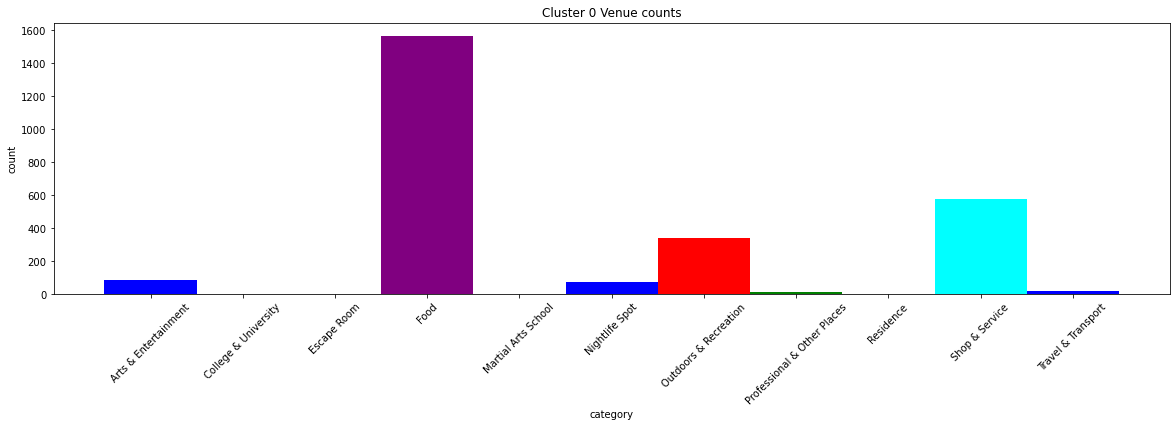

,category,count
0,Arts & Entertainment,88
1,College & University,1
2,Escape Room,3
3,Food,1566
4,Martial Arts School,2
5,Nightlife Spot,77
6,Outdoors & Recreation,344
7,Professional & Other Places,17
8,Residence,0
9,Shop & Service,575


In [30]:
cluster0=createClusterDF(0)
bars = cluster0['category']
height = cluster0['count']
createBarPlot(bars,height,0)
createClusterDF(0)

Cluster 0 has lots of restaurants, shops and nightlife spots. Based on the most common venues this cluster is a Downtown Cluster, cluster where more people gather, eat, shop and have fun.

### Most common venues in Cluster 1


In [31]:
santaclara_merged.loc[santaclara_merged['Cluster Labels'] == 1]

,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,94022,322,19378,1662,Los Altos,37.377140,-122.124120,1,Food,Shop & Service,Outdoors & Recreation,Travel & Transport,Arts & Entertainment,Residence,Professional & Other Places,Nightlife Spot
1,94024,347,23961,1448,Los Altos,37.353741,-122.087170,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Travel & Transport,Professional & Other Places,Residence,Nightlife Spot
2,94040,1052,35845,2935,Mountain View,37.380207,-122.087870,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Residence,Professional & Other Places,Nightlife Spot
3,94041,433,14394,3008,Mountain View,37.389490,-122.078460,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot
4,94043,739,31488,2347,Mountain View,37.406790,-122.074610,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places,Nightlife Spot
5,94085,876,23612,3710,Sunnyvale,37.388940,-122.017956,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Nightlife Spot,Travel & Transport,Residence,Professional & Other Places
6,94086,1381,49630,2783,Sunnyvale,37.378341,-122.023980,1,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Arts & Entertainment,Residence,Travel & Transport,Professional & Other Places
7,94087,966,57219,1688,Sunnyvale,37.350091,-122.036020,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Travel & Transport,Nightlife Spot,Residence,Professional & Other Places
8,94089,786,22313,3523,Sunnyvale,37.406289,-122.008380,1,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Nightlife Spot,Travel & Transport,Professional & Other Places,Residence


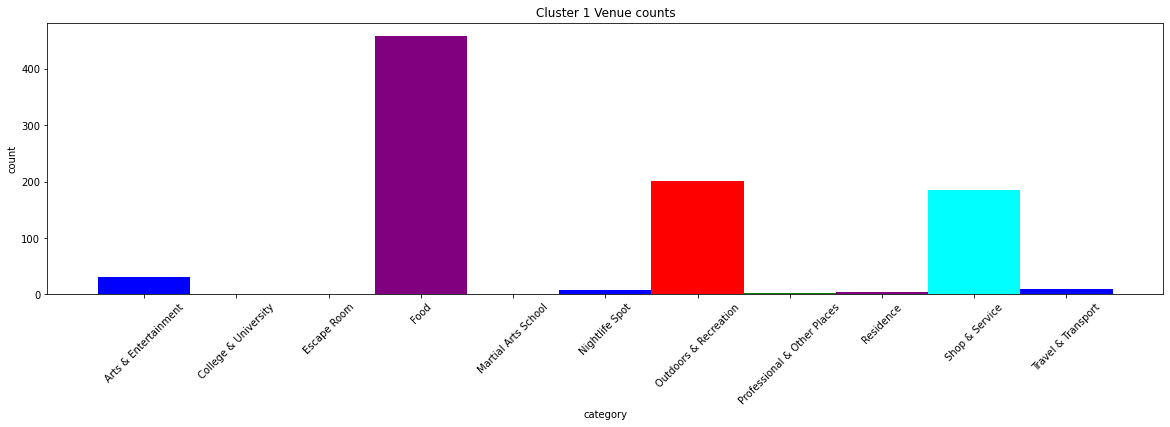

,category,count
0,Arts & Entertainment,30
1,College & University,0
2,Escape Room,0
3,Food,459
4,Martial Arts School,0
5,Nightlife Spot,8
6,Outdoors & Recreation,201
7,Professional & Other Places,2
8,Residence,5
9,Shop & Service,186


In [32]:
clusterNo = 1
cluster1=createClusterDF(clusterNo)
bars = cluster1['category']
height = cluster1['count']
createBarPlot(bars,height,1)
createClusterDF(clusterNo)

Cluster 1 has more Outdoors and Recreation spot, while it has many restaurants and shops it fails in numbers compaired to Cluster 0. We will call it the Outdoors and Recreation cluster.

### Most common venues in Cluster 2

In [33]:
santaclara_merged.loc[santaclara_merged['Cluster Labels'] == 2]

,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
9,94301,345,17191,2007,Palo Alto,37.443688,-122.15071,2,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,College & University,Travel & Transport,Professional & Other Places,Residence
10,94304,105,3902,2691,Palo Alto,37.397823,-122.16605,2,Food,Outdoors & Recreation,Shop & Service,College & University,Arts & Entertainment,Travel & Transport,Professional & Other Places,Residence
11,94305,112,15730,712,Stanford,37.427039,-122.16496,2,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,College & University,Professional & Other Places,Nightlife Spot,Travel & Transport
12,94306,408,27549,1481,Palo Alto,37.419389,-122.13273,2,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,College & University,Travel & Transport,Professional & Other Places,Martial Arts School


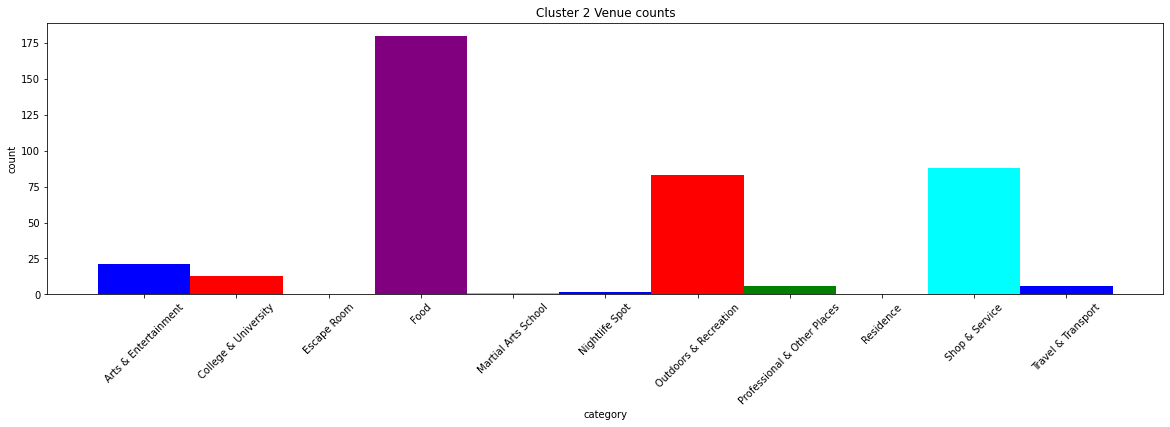

,category,count
0,Arts & Entertainment,21
1,College & University,13
2,Escape Room,0
3,Food,180
4,Martial Arts School,1
5,Nightlife Spot,2
6,Outdoors & Recreation,83
7,Professional & Other Places,6
8,Residence,0
9,Shop & Service,88


In [34]:
clusterNo = 2
cluster2=createClusterDF(clusterNo)
bars = cluster2['category']
height = cluster2['count']
createBarPlot(bars,height,2)
createClusterDF(clusterNo)

Cluster 2 has the most number of College and Universities, it too has many outdoor and recreation spots.
We will call this the Academy cluster.

### Most common venues in Cluster 3

In [35]:
santaclara_merged.loc[santaclara_merged['Cluster Labels'] == 3]

,zipcode,Cases,Population,Rate,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
13,95002,145,2146,6757,Alviso,37.427439,-121.975210,3,Food,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Shop & Service,Professional & Other Places,Nightlife Spot,Residence
14,95008,1512,46513,3251,Campbell,37.278843,-121.954460,3,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Travel & Transport,Professional & Other Places,College & University,Arts & Entertainment
15,95013,0,77,0,Coyote,37.189396,-121.705327,3,Outdoors & Recreation,Food,Travel & Transport,Shop & Service,Residence,Professional & Other Places,Nightlife Spot,Martial Arts School
16,95014,654,62430,1048,Cupertino,37.317909,-122.047790,3,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Professional & Other Places,Travel & Transport,Residence,Martial Arts School
17,95020,5769,63852,9035,Gilroy,37.016943,-121.565810,3,Food,Shop & Service,Outdoors & Recreation,Travel & Transport,Professional & Other Places,Nightlife Spot,College & University,Residence
18,95030,288,13288,2167,Los Gatos,37.228594,-121.983960,3,Food,Outdoors & Recreation,Shop & Service,Arts & Entertainment,Nightlife Spot,Travel & Transport,Professional & Other Places,Martial Arts School
19,95032,574,26281,2184,Los Gatos,37.241193,-121.953400,3,Food,Outdoors & Recreation,Shop & Service,Travel & Transport,Professional & Other Places,Nightlife Spot,Martial Arts School,Residence
20,95035,2667,77562,3439,Milpitas,37.436451,-121.894380,3,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport,Residence
21,95037,2657,51652,5144,Morgan Hill,37.137595,-121.662110,3,Food,Shop & Service,Outdoors & Recreation,Travel & Transport,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Residence
22,95046,500,6025,8299,San Martin,37.088746,-121.600480,3,Food,Outdoors & Recreation,Shop & Service,Travel & Transport,Arts & Entertainment,Nightlife Spot,Residence,Professional & Other Places


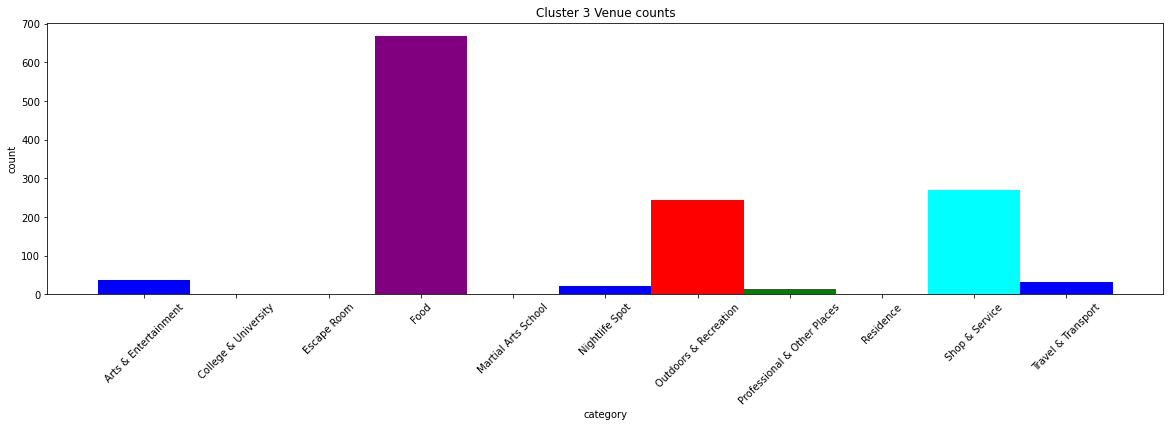

,category,count
0,Arts & Entertainment,38
1,College & University,2
2,Escape Room,0
3,Food,669
4,Martial Arts School,2
5,Nightlife Spot,23
6,Outdoors & Recreation,244
7,Professional & Other Places,13
8,Residence,0
9,Shop & Service,271


In [36]:
clusterNo = 3
cluster3=createClusterDF(clusterNo)
bars = cluster3['category']
height = cluster3['count']
createBarPlot(bars,height,3)
createClusterDF(clusterNo)

Cluster 3 has like other cluster many restaurants shops and outdoor spots, but unlike other clusters it has more Travel and Transport spots. We will call it the Travel cluster.

---
### Comparison of the number of venues for each cluster

In [37]:
santaclara_merged_bar = santaclara_merged.groupby('Cluster Labels',as_index=False).sum()
santaclara_merged_bar=santaclara_merged_bar.drop(columns=['Latitude','Longitude'])
santaclara_merged_bar

,Cluster Labels,zipcode,Cases,Population,Rate
0,0,2758657,58689,1050264,147219
1,1,846517,6902,277840,23104
2,2,377216,970,64372,6891
3,3,1425515,19074,506651,52605


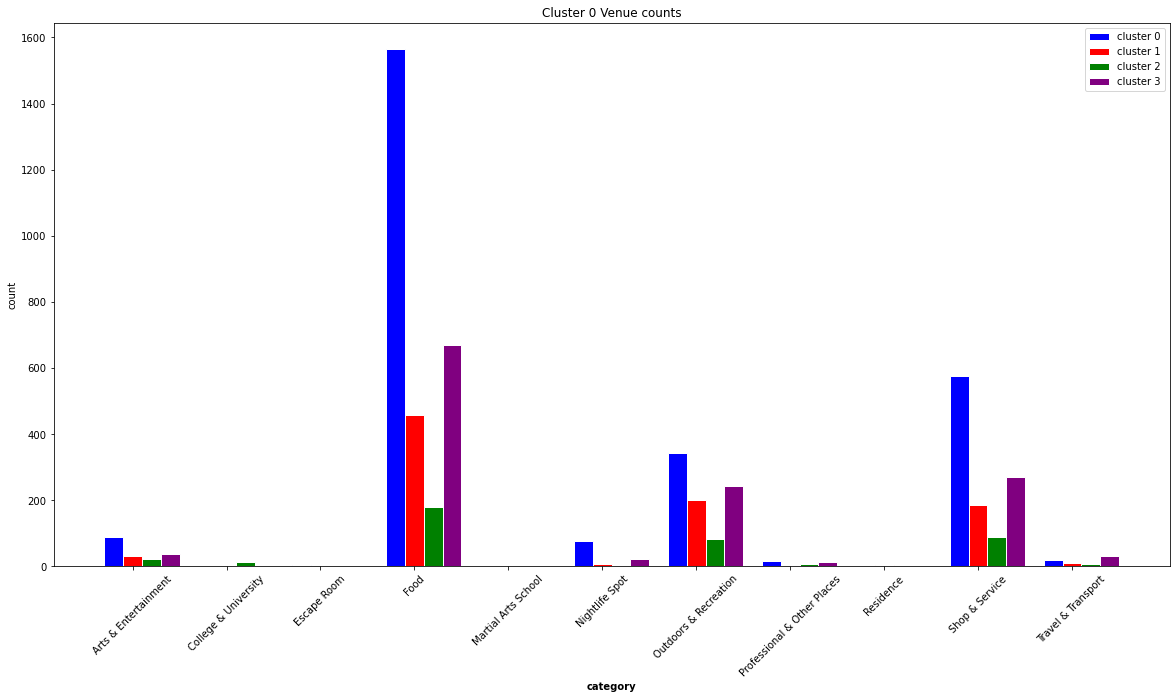

In [67]:
barWidth = 0.20
    
# set height of bar
bars1 = cluster0['count']
bars2 = cluster1['count']
bars3 = cluster2['count']
bars4 = cluster3['count']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='cluster 0')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='cluster 1')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='cluster 2')
plt.bar(r4, bars4, color='purple', width=barWidth, edgecolor='white', label='cluster 3')
plt.rcParams["figure.figsize"] = (20, 10)

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], cluster0['category'])
plt.tick_params(axis='x', which='major', labelsize=10,labelrotation=45)

# labels
plt.title('Cluster '+ str(cluster)+' Venue counts')
plt.xlabel('category')
plt.ylabel('count')
# Create legend & Show graphic
plt.legend()
plt.show()


In [39]:

print( str(cluster0['count']/(santaclara_merged_bar.iloc[0,3]/1000)))

0     0.083788
1     0.000952
2     0.002856
3     1.491054
4     0.001904
5     0.073315
6     0.327537
7     0.016186
8     0.000000
9     0.547481
10    0.017139
Name: count, dtype: float64


---
### Covid-19 cases for each cluster

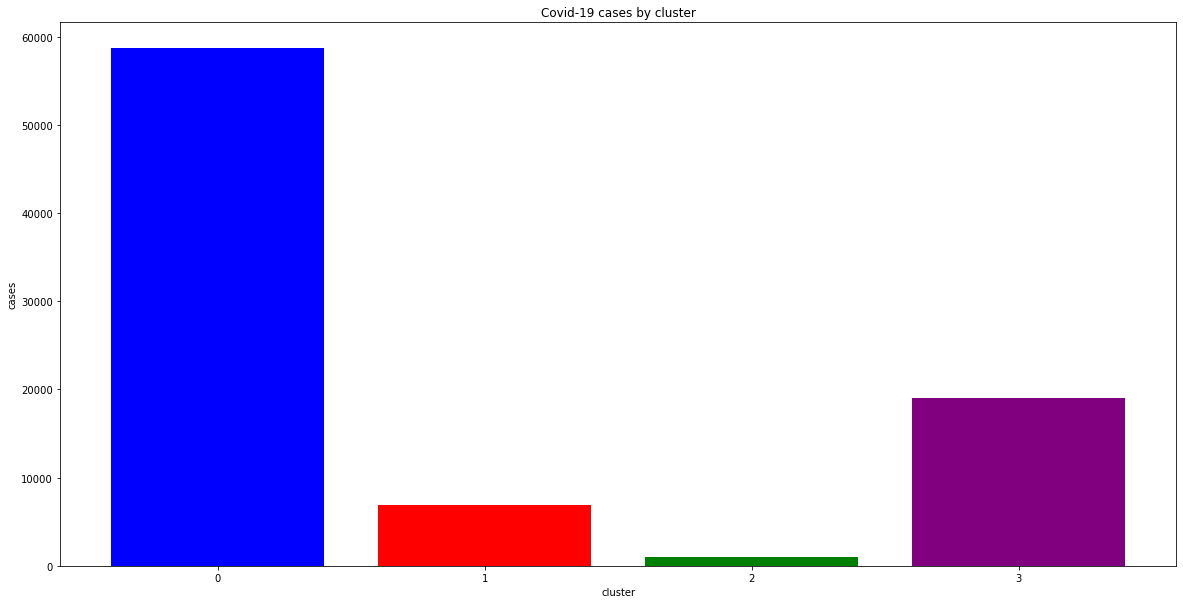

In [40]:
#Total Covid-19 cases by cluster
bars = santaclara_merged_bar['Cluster Labels']
height = santaclara_merged_bar['Cases']
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['blue', 'red', 'green', 'purple', 'cyan'])
x_ticks = np.arange(0, kclusters, 1)
plt.xticks(y_pos, bars)
plt.title('Covid-19 cases by cluster')
plt.xlabel('cluster')
plt.ylabel('cases')

plt.show()


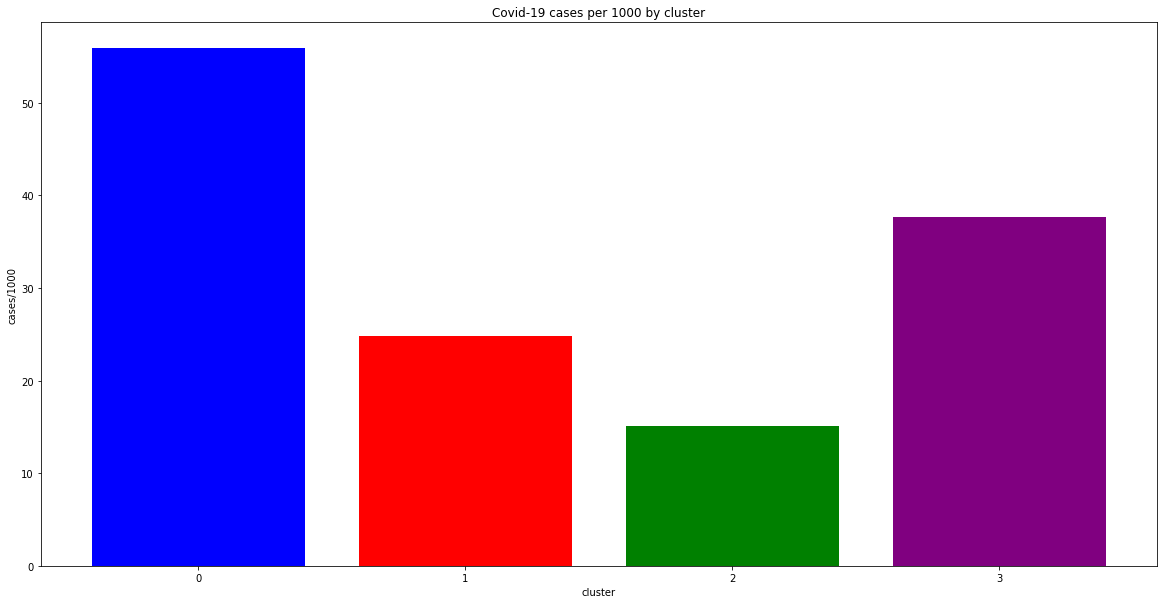

In [41]:
#Covid-19 cases per 1000 by cluster
bars = santaclara_merged_bar['Cluster Labels']
height = santaclara_merged_bar['Cases']/(santaclara_merged_bar['Population']/1000)
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['blue', 'red', 'green', 'purple', 'cyan'])
x_ticks = np.arange(0, kclusters, 1)
plt.xticks(y_pos, bars)
plt.title('Covid-19 cases per 1000 by cluster')
plt.xlabel('cluster')
plt.ylabel('cases/1000')

plt.show()


---
### Results and Discussion


Based on our study neighborhoods in cities with high population like San Jose have the most number of Covid-19 case. Neighborhoods immediately near San Jose like Milpitas, Santa Clara and Morgan hill have high cases, but going further south to like San Martin and Gilroy, cases increase significantly. Going further north west to Palo Alto and Mountain View cases decreased.

The study shows that population and location affect the number of Covid-19 cases, but venues near neighborhood affect the number of cases?

We grouped the neighborhoods by clusters using K-means clustering. Based on our study, the Downtown cluster or thr cluster with the most number of restaurants, shops and nightlife spot has the most number of Covid-19 cases. The travel cluster wgich are neighborhoods with the most number of travel and transport spots have the second highest number of cases. The Outdoor and Recreation cluster which are neighborhoods with mostly outdoor and recreation pots have lower number of cases. The cluster with the fewest number of Covid-19 cases is the Academy cluster, the cluster that has the most number of Universities and Colleges.

Bacause of the stay-at-home order, closure of many Universities, College and Outdoor recreation spots lessens the number of Covid-19 cases in neighborhoods with many of thoose venues. Neighborhoods near where many people gather to eat out, shop and party have a larger chance to have more Covid-19 cases.


### Conclusion

We created this project to know why some neighborhoods have more Covid-19 cases than others. By gathering venues near Santa Clara county neighborhoods using Foursquare api and clustering them, we found out that certaing venue types affect the number of cases. Population and location affects the number of cases too.

This study is just a guide using the data that are available to us. Many other factors can affect the number of Covid-19  cases that are not used in this study.

This can be a small tool, a small glimpse to help stakeholders in making decisions about the relationship of neighborhoods and Covid-19 cases. This should not be used as a be-all end-all study used to make decisions.

----






created by James Cuevo for Applied Data Science Capstone project 2021